In [111]:
import os
os.getcwd()

'/Users/chidam'

In [112]:
import pandas as pd
df=pd.read_csv('/Users/chidam/Desktop/candidate_dataset.csv')

In [78]:
#To check how many records we have in the dataset
len(df)

491372

In [79]:
#To check whether we have any missing values

df.columns[df.isnull().any()]

#These three columns have missing values

Index(['DEPARTURE_DELAY', 'DISTANCE', 'ARRIVAL_DELAY'], dtype='object')

In [80]:
#Let's get the count of missing values in those three columns
df.isnull().sum()

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
AIRLINE                  0
FLIGHT_NUMBER            0
TAIL_NUMBER              0
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
DEPARTURE_TIME           0
DEPARTURE_DELAY        107
SCHEDULED_TIME           0
DISTANCE               107
SCHEDULED_ARRIVAL        0
ARRIVAL_TIME             0
ARRIVAL_DELAY          201
dtype: int64

In [113]:
#I ought to express MONTH in words
import calendar
df['MONTH'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [82]:
#To check number of flights in each month
df.groupby('MONTH')['FLIGHT_NUMBER'].count()

#The maximum number of flights flew in July: 43977

MONTH
Apr    41264
Aug    43471
Dec    40318
Feb    35018
Jan    39189
Jul    43977
Jun    42507
Mar    42324
May    41950
Nov    39914
Oct    41851
Sep    39589
Name: FLIGHT_NUMBER, dtype: int64

In [114]:
df.columns[df.isnull().any()]

Index(['DEPARTURE_DELAY', 'DISTANCE', 'ARRIVAL_DELAY'], dtype='object')

In [115]:
#To fill the missing values in the column: DISTANCE with the median value from the column values. The reasoning is that
# flights to Alaska from, say, New York might cover huge distance while flights from San Francisco to Los Angeles cover less
# distance comapratively. Therefore filling in with mean value might skew the data. So going with median value.



df.loc[df['DISTANCE'].isnull(), 'DISTANCE']=df['DISTANCE'].median()



In [116]:
#Replacing missing values in the column:'DEPARTURE_DELAY' with median value from the same column

df.loc[df['DEPARTURE_DELAY'].isnull(), 'DEPARTURE_DELAY']=df['DEPARTURE_DELAY'].median()


In [117]:
#Replacing missing values in the column:'ARRIVAL_DELAY' with median value from the same column

df.loc[df['ARRIVAL_DELAY'].isnull(), 'ARRIVAL_DELAY']=df['ARRIVAL_DELAY'].median()


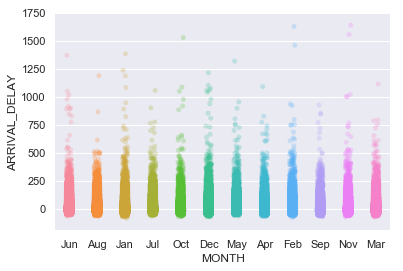

In [220]:
#To plot 'ARRIVAL_DELAY' against 'MONTH'. A common trend can be observed: after 500 minutes the data gets very sparse. Also
#there are negative values representing the flights that arrived earlier than the scheduled arrival time.
#Now the question is that what is the limit after which the data points could be considered outliers?

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
sns.stripplot(x=df['MONTH'], y=df['ARRIVAL_DELAY'], data=df, dodge=True, jitter=True,alpha=.25, zorder=1)

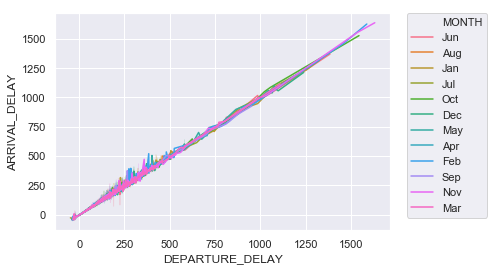

In [256]:
# To plot 'DEPARTURE_DELAY' Vs. 'ARRIVAL_DELAY' for each month. The 'DEPARTURE_DELAY' seems to be positively correlated
# with 'ARRIVAL_DELAY' except for few cases where there are variations. It may not be true once we take a closer look to figure
# out. Also looks like all the actions take place within therange of 50 to 750 minutes. So zooming in on that range 
# might reveal more insights.

ax = sns.lineplot(x=df['DEPARTURE_DELAY'], y=df['ARRIVAL_DELAY'], hue=df['MONTH'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [303]:
len(df.loc[df['DEPARTURE_DELAY']<0, 'DEPARTURE_DELAY'].tolist())

281020

In [304]:
len(df.loc[df['DEPARTURE_DELAY']<0, 'ARRIVAL_DELAY'].tolist())

281020

/Users/chidam/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


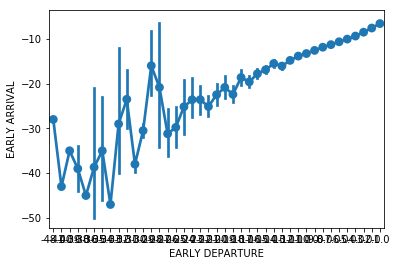

In [68]:
#Three types of situations exist:
# 1. Early departure leading to late arrival(not surprising as there could be a lot of extrogenous factors like: poor weather condition, old aircraft, and inexperienced pilot that played a role)
# 2. Late departure leading to late arrival(most cases)
# 3. Late departure leading to early arrival(interesting case)
#4. Early departure leading to early arrival(expected but not always possible in reality)

#Early departure leading to early arrival. On a high level an early start in departure had led to an early arrival. Also
#there are not, at least many, cases that had an early departure and late arrival as there are no positive values in 'ARRIVAL_DELAY' 
#Although there are variations in arrival time like 50 minutes early departure had led to approx. 20 minutes early arrival,
#it is rather safe to say there are not any outliers we have to worry about

ax = sns.pointplot(x=df.loc[df['DEPARTURE_DELAY']<0, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']<0, 'ARRIVAL_DELAY'].tolist(), legend='full', data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='EARLY DEPARTURE', ylabel='EARLY ARRIVAL')
# plt.figure(figsize=(8,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

[<matplotlib.text.Text at 0x1284d37f0>, <matplotlib.text.Text at 0x128edda20>]

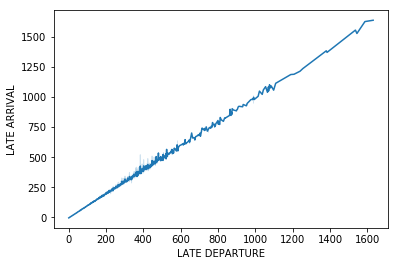

In [70]:
#Late departure Vs. arrival. It's clear that late departure had not led to early arrival. The trend seems to be linear with
# fewer to many variations within the range 250 to 500. We shall also zoom in on the range and see what is going on. 
# Also at and after 1200 minutes(20 hours) in departure there are not many cases, so they very well could represent rare 
# cases. We shall dive deep into those values to get better insight. 

ax = sns.lineplot(x=df.loc[df['DEPARTURE_DELAY']>0, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>0, 'ARRIVAL_DELAY'].tolist(), legend='full', data=df) 
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')


[<matplotlib.text.Text at 0x12936f518>, <matplotlib.text.Text at 0x129350400>]

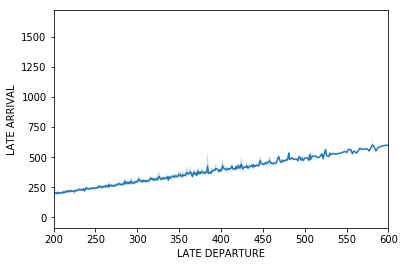

In [74]:
#This visualization is a vivid example to demonstrate what outliers or extreme data points can do to stretch the data points
#The trend seems linear with not many huge variations. There seemed to be variations within the range 350 to 525 so let's
#zoom in on that range in the next visualization.

ax = sns.lineplot(x=df.loc[df['DEPARTURE_DELAY']>0, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>0, 'ARRIVAL_DELAY'].tolist(), legend='full', data=df) 
ax.set_xlim([200, 600])  
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')





[<matplotlib.text.Text at 0x12db22b00>, <matplotlib.text.Text at 0x12db1bfd0>]

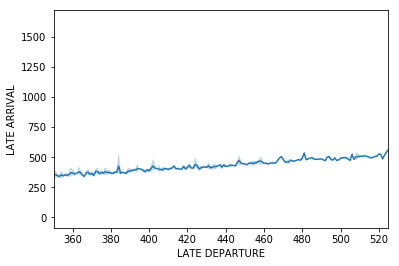

In [81]:
#Zooming in on the range 350 to 525. The variations like 380 minutes in late departure led to approx. 500 minutes late arrival
#are not extreme and almost all the changes in arrival can be represented within the approx. range 250 to 500 max. That prompts
#us to visualize what happens when departure delay exceeds 520?

ax = sns.lineplot(x=df.loc[df['DEPARTURE_DELAY']>0, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>0, 'ARRIVAL_DELAY'].tolist(), legend='full', data=df) 
ax.set_xlim([350, 525])  
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')




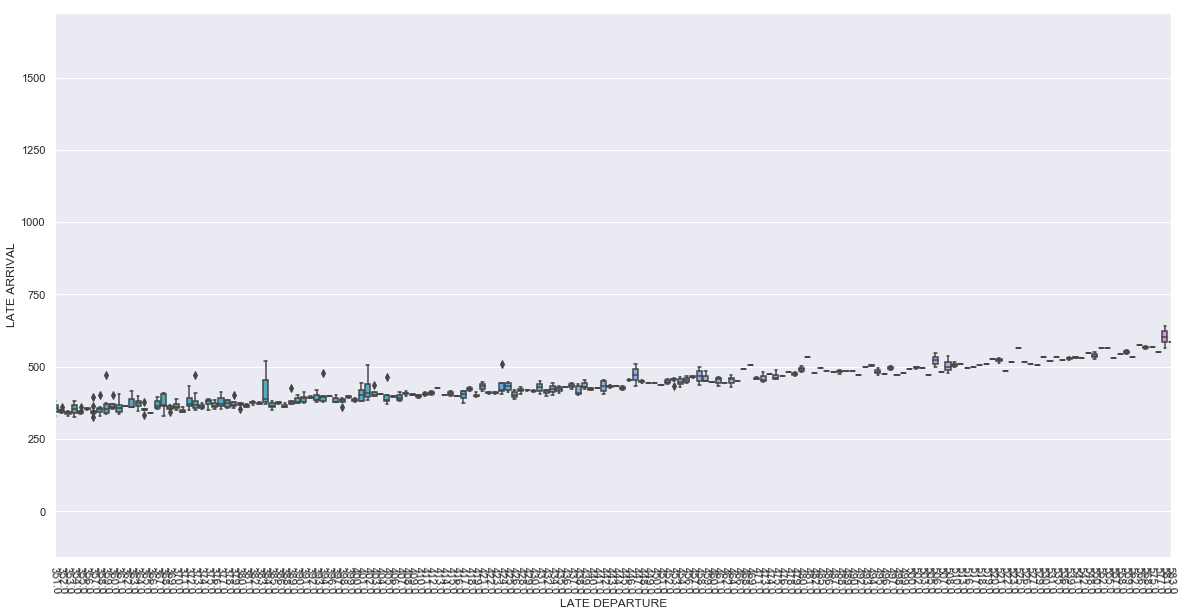

In [155]:
#Let's set y_limit from 250 to 500 along with x_limit and plot a boxplot to get better visualization. There seem to be outliers
#in the y_limit at even 475 minutes in arrival. So let's zoom in from 250 to 550 or 600 on y_axis. Also the trend seems
#increasing but cannot be very sure with a plot like this.
plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df.loc[df['DEPARTURE_DELAY']>0, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>0, 'ARRIVAL_DELAY'].tolist(), data=df) 
ax.set_xlim([350, 525]) 
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);



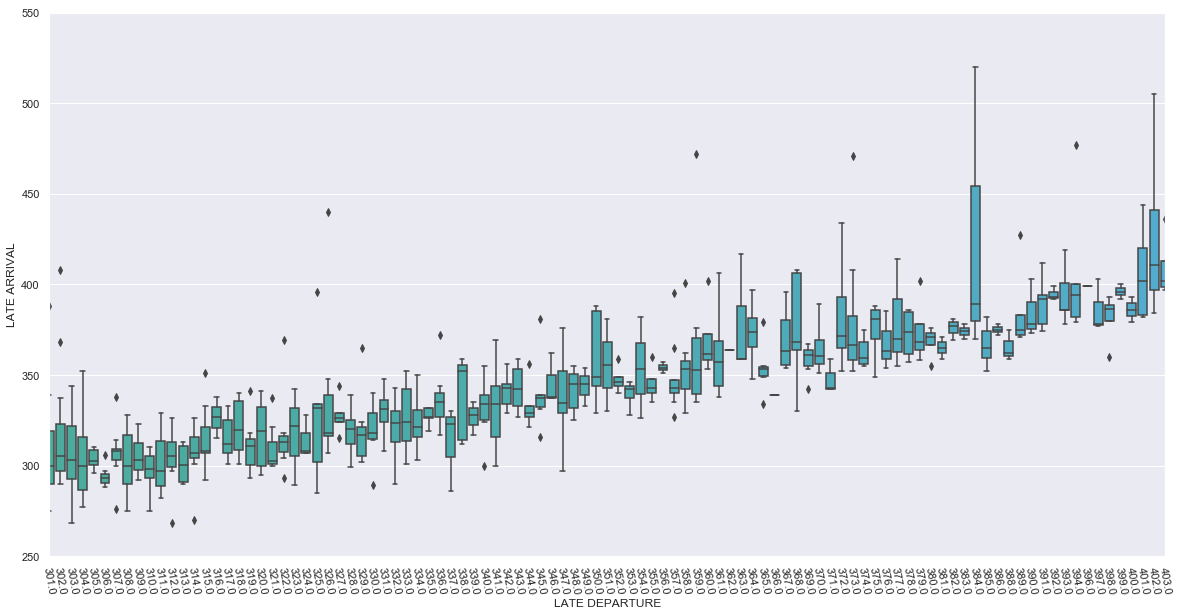

In [108]:
#Let's change the size of the plot to get a better view. Only the two points at approx. 383 minutes and 402 minutes in departure delay led to a maximum delay of above 500 minutes in
# arrival. The pattern is not linear once we have zoomed in, although it looked like one when we began visualizing both the delays,
#as the increase in departure delay does not seem to increase the delay in arrival.

plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df.loc[df['DEPARTURE_DELAY']>0, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>0, 'ARRIVAL_DELAY'].tolist(), data=df) 
ax.set_xlim([300, 400])
ax.set_ylim([250, 550])
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);

[<matplotlib.text.Text at 0x18a7eccc0>, <matplotlib.text.Text at 0x18a7dce10>]

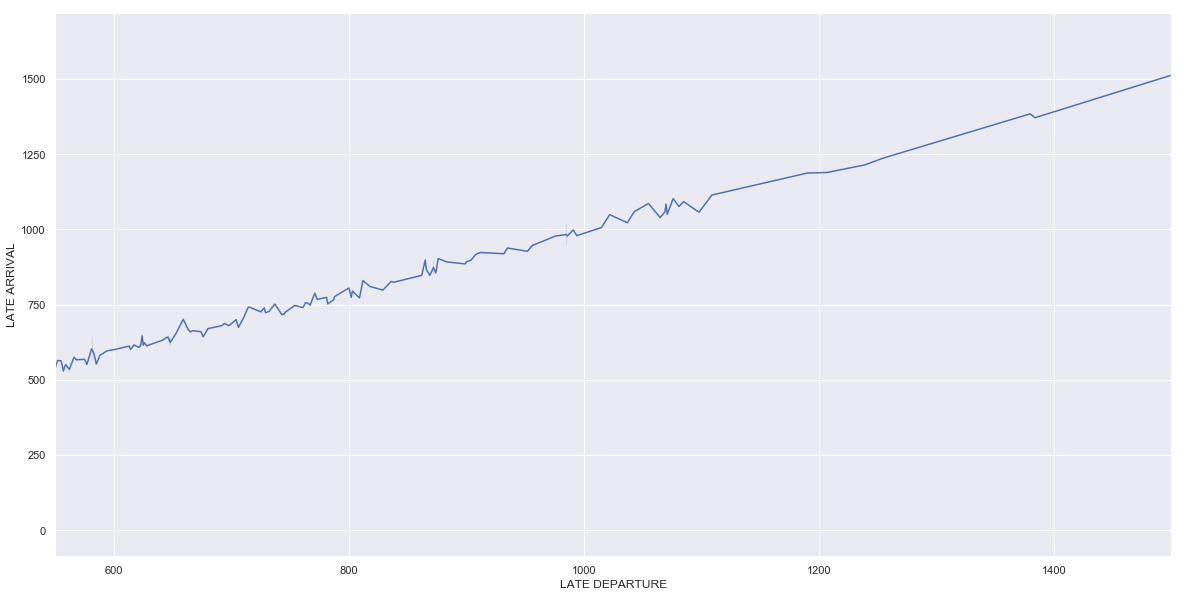

In [110]:
#Let's check the data points after 550 on x_axis. Looks like an increasing trend with only a few cases after approx. 1100 minutes (approx. 18 hours)
#in departure delay. So let's zoom in on the range: 550 to 1100 in departure delay in the next plot in the cell below.

plt.figure(figsize=(20,10))
ax = sns.lineplot(x=df.loc[df['DEPARTURE_DELAY']>0, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>0, 'ARRIVAL_DELAY'].tolist(), data=df) 
ax.set_xlim([550, 1500])
# ax.set_ylim([250, 500])
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=-80)


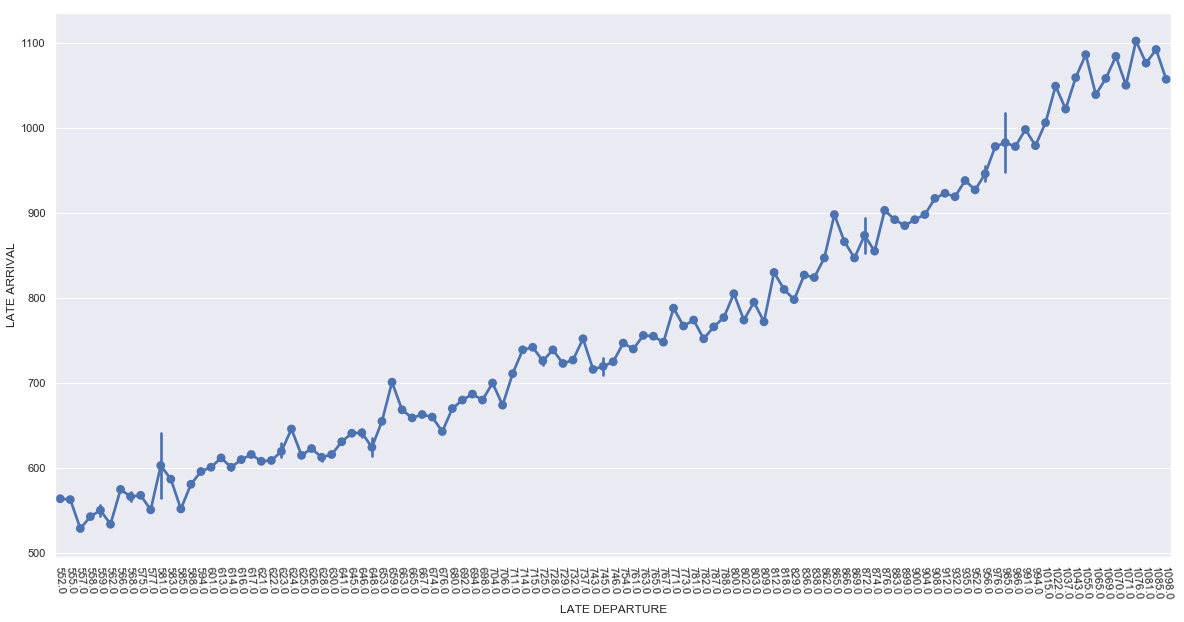

In [148]:

#Zooming in on the range: 550 to 1100 in departure delay and range: 450 to 1100 in arrival delay as mentioned in the cell
#above.
    
plt.figure(figsize=(20,10))
ax = sns.pointplot(x=df.loc[(df['DEPARTURE_DELAY']>550) & (df['DEPARTURE_DELAY']<1100), 'DEPARTURE_DELAY'].tolist(), y=df.loc[(df['DEPARTURE_DELAY']>550) & (df['DEPARTURE_DELAY']<1100), 'ARRIVAL_DELAY'].tolist(), data=df) 
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);

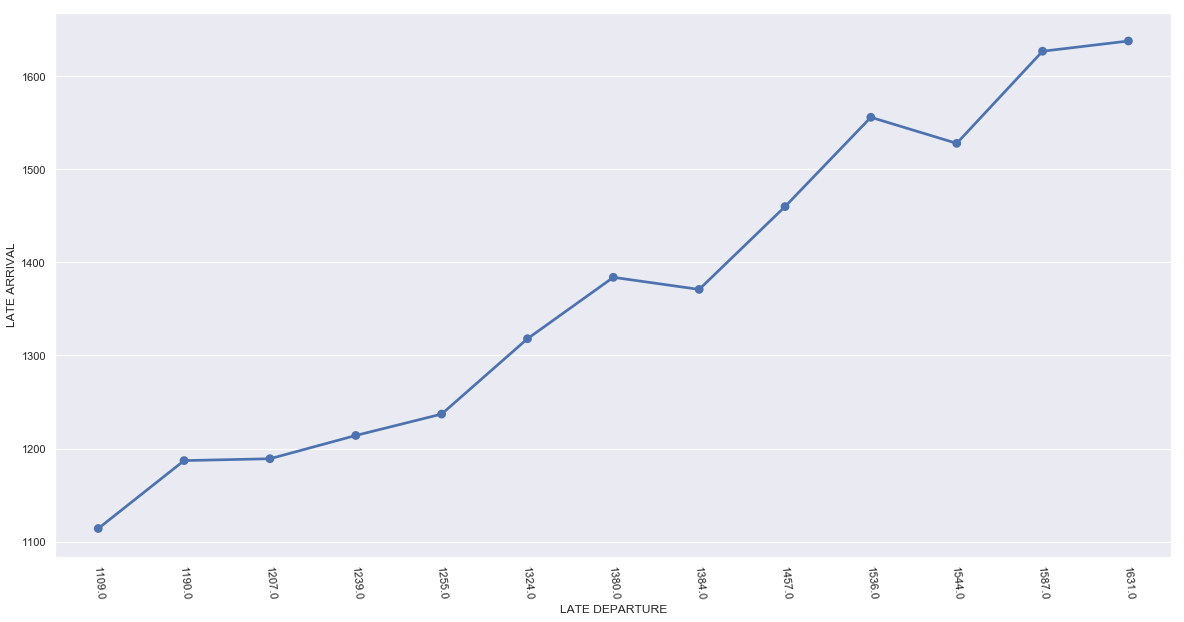

In [149]:
#Visualizing the data points when 'DEPARTURE_DELAY'>1100
plt.figure(figsize=(20,10))
ax = sns.pointplot(x=df.loc[df['DEPARTURE_DELAY']>1100, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>1100, 'ARRIVAL_DELAY'].tolist(), data=df) 
ax.set(xlabel='LATE DEPARTURE', ylabel='LATE ARRIVAL')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);


In [88]:
#After visualizing different segments of data with re to departure delay and arrival delay, it's now time to recognize outliers
#and remove them
#First let's check how many data points are there when 'DEPARTURE_DELAY' > 1100 minutes. There seem to be 221 records in
#the dataset when 'DEPARTURE_DELAY'>1100

len(df[df['DEPARTURE_DELAY']>1100])



13

In [89]:
#Let's also check how many data points are there when 'DEPARTURE_DELAY'> 550 and 'DEPARTURE_DELAY'< 1100 minutes
len(df[(df['DEPARTURE_DELAY']>550) & (df['DEPARTURE_DELAY']<1100)])


127

In [90]:
#That leaves us to check the number of records when 'DEPARTURE_DELAY'<550 and 'DEPARTURE_DELAY'> 0. Clearly the data points in this segment represent
#majority

len(df[(df['DEPARTURE_DELAY']<550) & (df['DEPARTURE_DELAY']>0)])

181822

In [39]:
#Finally to check the number of records when 'DEPARTURE_DELAY'<0

len(df[df['DEPARTURE_DELAY']<0])


281020

In [119]:
#I ought to bring in more dimensions by categorizing the data according to each season.
# Going to consider the seasons, on a high level, as:
# Spring (March, April, May)
# Summer (June, July, August)
# Autumn (September, October, November)
# Winter (December, January, February)


#To categorize the months into: Spring, Summer, Autumn, Winter
    
df.loc[(df['MONTH']=='Jun') | (df['MONTH']=='Jul') | (df['MONTH']=='Aug'),'MONTH']='Summer'
df.loc[(df['MONTH']=='Mar') | (df['MONTH']=='Apr') | (df['MONTH']=='May'),'MONTH']= 'Spring'
df.loc[(df['MONTH']=='Sep') | (df['MONTH']=='Oct') | (df['MONTH']=='Nov'),'MONTH']='Autumn'
df.loc[(df['MONTH']=='Jan') | (df['MONTH']=='Feb') | (df['MONTH']=='Dec'),'MONTH']='Winter'



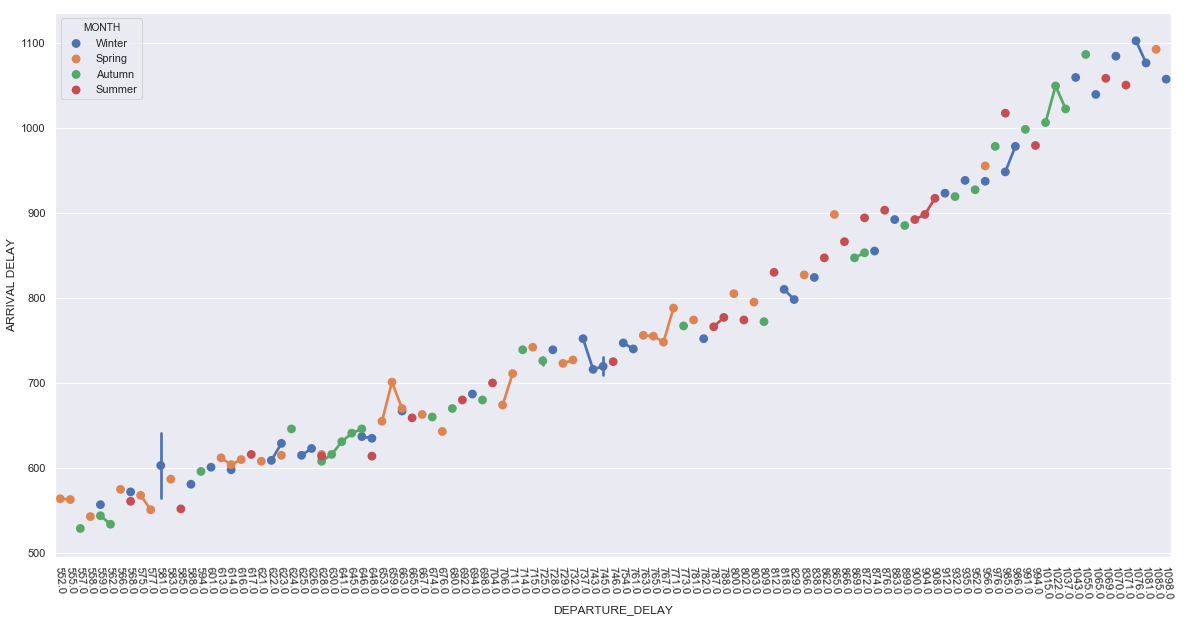

In [323]:
#First let's check the situation where 'DEPARTURE_DELAY'> 550 and 'DEPARTURE_DELAY'< 1100 minutes. Looks like the delay 
#looks distributed amongst the seasons: Spring, Autumn, and Winter with few points from summer sprinkled between ranges.  
#Let us take a deeper look using a plot in the next cell below

plt.figure(figsize=(20,10))
# ax = sns.catplot(x=df.loc[df['DEPARTURE_DELAY']>550, 'DEPARTURE_DELAY'].tolist(), y=df['MONTH'], data=df) 



ax = sns.pointplot(x=df.loc[(df['DEPARTURE_DELAY']>550) & (df['DEPARTURE_DELAY']<1100), 'DEPARTURE_DELAY'].tolist(), y=df.loc[(df['DEPARTURE_DELAY']>550) & (df['DEPARTURE_DELAY']<1100), 'ARRIVAL_DELAY'].tolist(), hue=df.loc[(df['DEPARTURE_DELAY']>550) & (df['DEPARTURE_DELAY']<1100), 'MONTH'], data=df)
# plt.tight_layout()
ax.set(xlabel='DEPARTURE_DELAY', ylabel='ARRIVAL DELAY')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);

# ax = sns.lineplot(x=df['DEPARTURE_DELAY'], y=df['ARRIVAL_DELAY'], hue=df['MONTH'], data=df)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

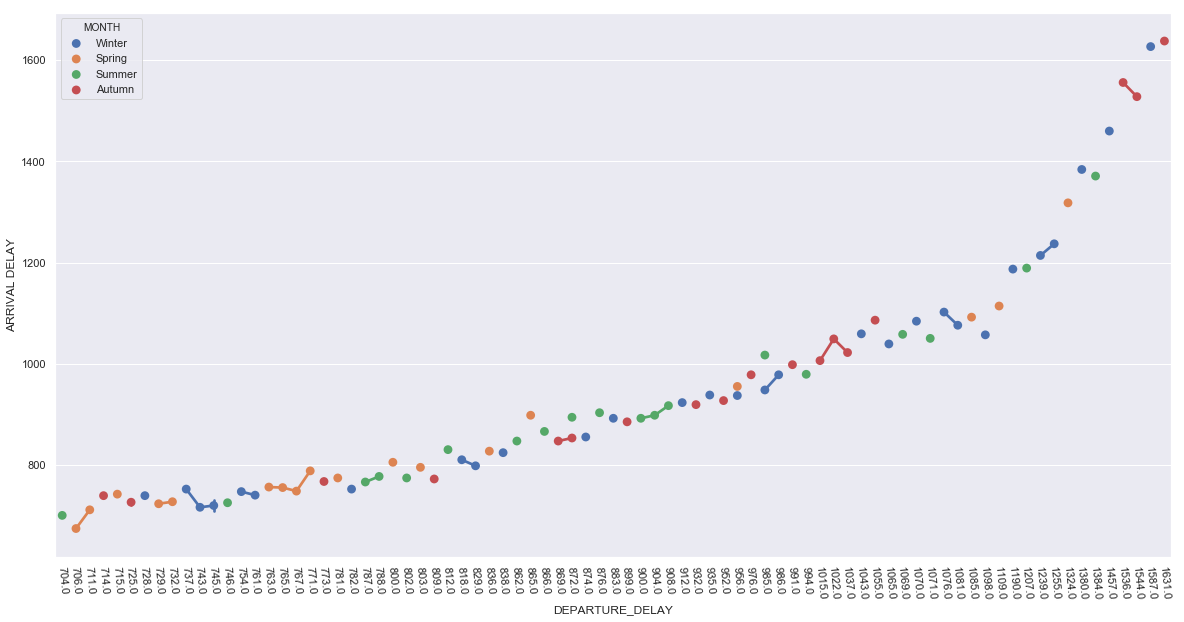

In [326]:
#Let's dive deeper by considering 'DEPARTURE_DELAY'>700 because after that there seems to be an increasing trend amongst
#summer, autumn, and winter. Blue and green dots seem prevalent, but cannot say for sure. 


plt.figure(figsize=(20,10))
# ax = sns.catplot(x=df.loc[df['DEPARTURE_DELAY']>550, 'DEPARTURE_DELAY'].tolist(), y=df['MONTH'], data=df) 



ax = sns.pointplot(x=df.loc[df['DEPARTURE_DELAY']>700, 'DEPARTURE_DELAY'].tolist(), y=df.loc[df['DEPARTURE_DELAY']>700, 'ARRIVAL_DELAY'].tolist(), hue=df.loc[df['DEPARTURE_DELAY']>700, 'MONTH'], data=df)
# plt.tight_layout()
ax.set(xlabel='DEPARTURE_DELAY', ylabel='ARRIVAL DELAY')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);

In [120]:
#To check the number of records there are when 'DEPARTURE_DELAY'>700 per each season. Now it is obvious with the numbers 
#that winter tops the list more delays than the rest of the seasons. But it is not surprising as we expect delays in winter
#due to weather conditions, at the same time summer, autumn, and spring are not far off the winter range. 

df.loc[df['DEPARTURE_DELAY']>700, 'MONTH'].value_counts()


Winter    30
Summer    19
Autumn    19
Spring    18
Name: MONTH, dtype: int64

In [121]:
#Getting a copy of the dataset again to visualize the spread of delays across days in a month
df1=pd.read_csv('/Users/chidam/Desktop/candidate_dataset.csv')

In [122]:
#Filling the missing values with median

df1.loc[df1['DEPARTURE_DELAY'].isnull(), 'DEPARTURE_DELAY']=df1['DEPARTURE_DELAY'].median()

df1.loc[df1['ARRIVAL_DELAY'].isnull(), 'DEPARTURE_DELAY']=df1['ARRIVAL_DELAY'].median()



In [123]:
#Representing months in words for df1
import calendar
df1['MONTH'] = df1['MONTH'].apply(lambda x: calendar.month_abbr[x])

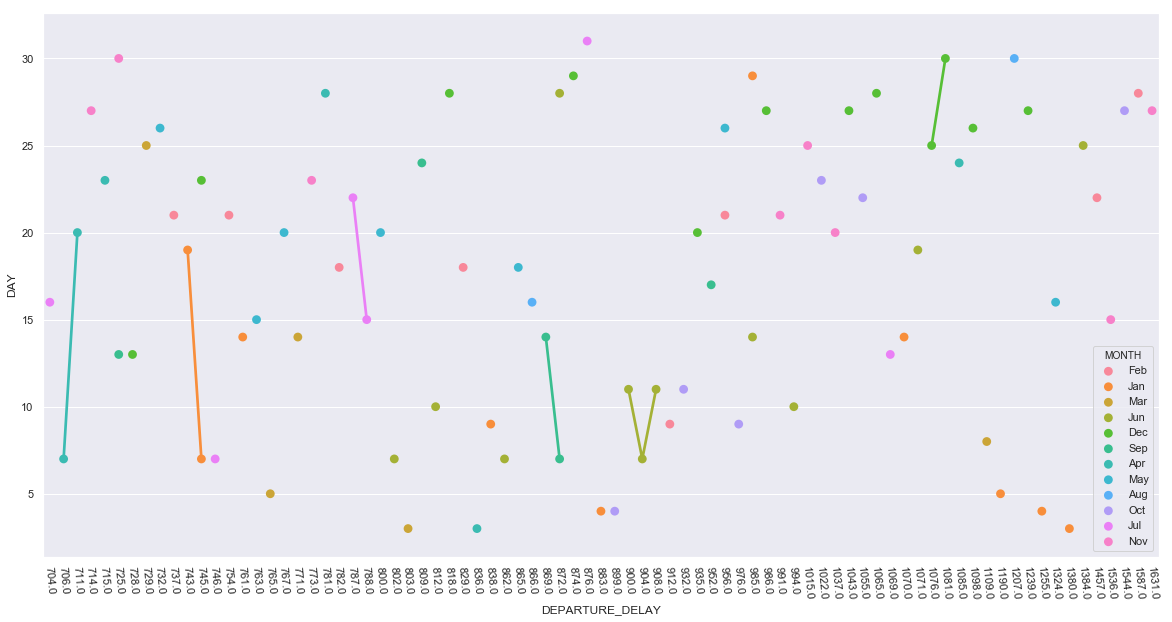

In [356]:
#On the first look this plot might seem to represent mixed data points from all 4 seasons. But on a closer look it cane be seen
# that green dots representing the month: December seem be distributed on the right hand side starting from 800 minutes in the
# 'Departure_Delay'. And most of the data points in December fall within 20 to 30 December. These data points very likely represent
#the holiday seasonality. I also checked for the following:
# July 4th long weekend: No clear trends for 4th July weekend
# Most of the delays in January happened, when 'DEPARTURE_DELAY'>700 of course, from the first week to 15th. This very likely
# to represent holiday seasonality or delays due to winter weather
# Thanksgiving Day: Most of the data points in November seemed to be distributed from 20 to 30 Nov and again these points are
# likely to represent the long weekend rush that affected flight departure

#It is possible to vet the data points further by airlines, aircraft(it is possible to figure out whether an aircraft is an old one or not using flight tail number), airport, 
# region/state/city(there could be remote areas surfacing as edge cases where flight delays are common), and so on... 
#But I am convinced enough to consider all the points above 700 minutes in 'DEPARTURE_DELAY' because of the fact
#that seasonality changes play a significant role in air travel and it makes more sense to capture the reality of the context. 

plt.figure(figsize=(20,10))

ax = sns.pointplot(x=df1.loc[df1['DEPARTURE_DELAY']>700, 'DEPARTURE_DELAY'].tolist(), y=df1.loc[df1['DEPARTURE_DELAY']>700, 'DAY'], hue=df1.loc[df1['DEPARTURE_DELAY']>700, 'MONTH'], data=df1)
# plt.tight_layout()
ax.set(xlabel='DEPARTURE_DELAY', ylabel='DAY')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);

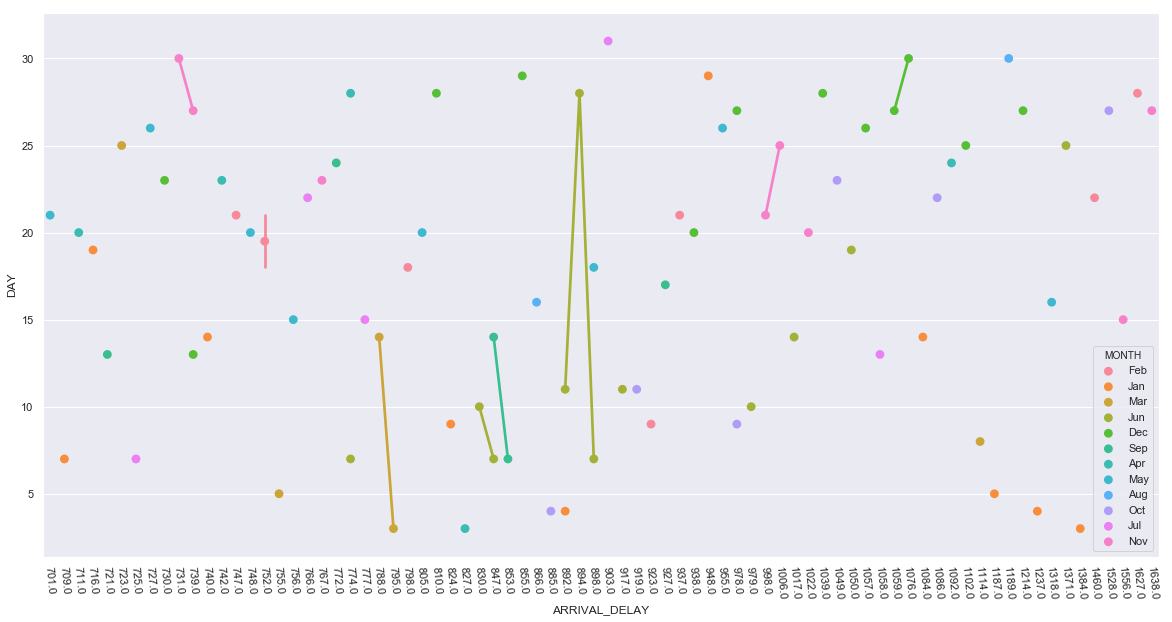

In [357]:
#It is also important to visualize the 'ARRIVAL_DELAY' Vs. 'DAY' and 'MONTH'. As 'ARRIVAL_DELAY' shows an increasing trend above 700 when 'DEPARTURE_DELAY' increases above 700
#visualizing 'ARRIVAL_DELAY'>700. Similar trends can be seen and so planning to keep all the data points in 'ARRIVAL_DELAY'>700
#Also researching gave the info:there were 32.77 percent flight delays in December 2015 

plt.figure(figsize=(20,10))

ax = sns.pointplot(x=df1.loc[df1['ARRIVAL_DELAY']>700, 'ARRIVAL_DELAY'].tolist(), y=df1.loc[df1['ARRIVAL_DELAY']>700, 'DAY'], hue=df1.loc[df1['ARRIVAL_DELAY']>700, 'MONTH'], data=df1)
# plt.tight_layout()
ax.set(xlabel='ARRIVAL_DELAY', ylabel='DAY')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);



In [360]:
Model Building Plan:
#As my goal is to predict delays in arrival so I am going to consider DEPARTURE_DELAY>0 and therefore ARRIVAL_DELAY>0
The idea is to predict the delay in arrival primarily using DEPARTURE_DELAY and SCHEDULED_DEPARTURE. Because using DEPARTURE_TIME
would be redundant and also it does not tell us whether the flights actually departed at that time without DEPARTURE_DELAY.

What Model and why? 
I am planning to build a Random Forest Regressor model to predict delay in arrivals. I chose RFR(Random Forest Regressor) as
the trend between both the delays can be well represented using a non-linear model.

Features considered:
MONTH, DAY, AIRLINE, FLIGHT_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_DELAY, SCHEDULED_TIME,
DISTANCE

Target variable:
ARRIVAL_DELAY

Feature Engineering:
Plan to categorize the high cardinal variables like AIRLINE, FLIGHT_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT using 
frequency encoding technique thereby reducing the number of features

What I ought to do if I have more time:
If I have time, I would like to cluster the nearby airports according to latitude and longitude and use either categories to represent them
or similar frequency endoding to represent them

I would like to get the time of the day in the sense to capture which part of the day the travel actually happened, meaning
early morning flights, depending on the airport, might have an early departure, at the same time in poor weather conditions
the early morning flights might have suffered a late departure too.




In [125]:
#A function to convert time available in 24 hour format into minutes in 12 hour format
#To convert SCHEDULED_DEPARTURE and SCHEDULED_TIME represented in hhmm (assuming its format: hhmm without colon in between) into minutes 

def time_conversion(d, x, y):
    import pandas as pd

    for element in range(len(x)):
        if len(str(x[element]))>=3:
            x[element]=(int(str(x[element])[:-2])*60)+int(str(x[element])[-2:])            
            
#             res=[datetime.datetime.strptime(times, "%H%M").strftime("%I:%M %p") for times in str(x[element])]
        else:
            continue
                  
    d.drop(y, axis=1)
    d[y]=pd.Series(x)
    return d[y].head()
    
    
time_conversion(df, df['SCHEDULED_TIME'].tolist(), 'SCHEDULED_TIME')




0    142
1    133
2     76
3    190
4     81
Name: SCHEDULED_TIME, dtype: int64

In [126]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [130]:
#To categorize AIRLINE, FLIGHT_NUMBER, ORIGIN_AIRPORT, and DESTINATION_AIRPORT and frequency encode the occurrence of these
#features 
#Frequency encoding: Number of times a unique value in the column occurred/total number of values in the column or length of the dataframe(train_set, test_set)

def categorize_encoding(d, x, y, col_name):
    #print(len(x))
    import pandas as pd
    for ele in range(len(x)):
        if x[ele] in y:
            x[ele]=y[x[ele]]

            
    d.drop(col_name, axis=1)
    d[col_name]=pd.Series(x)
    return d[col_name].head()
    
categorize_encoding(df, df['DESTINATION_AIRPORT'].tolist(), dict(df['DESTINATION_AIRPORT'].value_counts()/len(df)), 'DESTINATION_AIRPORT')

0    0.052952
1    0.011840
2    0.065922
3    0.036962
4    0.007225
Name: DESTINATION_AIRPORT, dtype: float64

In [131]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [22]:
df.columns[df.isnull().any()]

Index(['AIRLINE'], dtype='object')

In [132]:
#To consider only the data points with positive delays: both 'DEPARTURE_DELAY' and 'ARRIVAL_DELAY'

df=df[df['DEPARTURE_DELAY']>0].reset_index(drop=True)




In [133]:
# I am going to consider only the delayed values in both DEPARTURE_DELAY and ARRIVAL_DELAY and therefore will delete the negative
# values (47863) in 'ARRIVAL_DELAY' which indicate early arrival

df=df[df['ARRIVAL_DELAY']>0].reset_index(drop=True)

In [134]:
#To check the number of records per MONTH. Autumn has the lowest number of records, but not highly imbalanced to affect
#the model performance. But can fine tune this feature by bringing Spring, Winter, and Autumn to 50000 records and try for better performance of the model.
#It could be significant as I am analyzing the dataset primarily based on seasonality

df['MONTH'].value_counts()


Summer    38426
Winter    33875
Spring    32845
Autumn    24950
Name: MONTH, dtype: int64

In [135]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [69]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY'],
      dtype='object')

In [136]:
df=df.drop(['YEAR', 'DAY', 'DAY_OF_WEEK', 'TAIL_NUMBER', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME'], axis=1)

In [138]:
summer=pd.DataFrame()
winter=pd.DataFrame()
spring=pd.DataFrame()
autumn=pd.DataFrame()

In [139]:
summer=df.loc[df['MONTH']=='Summer']
winter=df.loc[df['MONTH']=='Winter']
spring=df.loc[df['MONTH']=='Spring']
autumn=df.loc[df['MONTH']=='Autumn']

In [140]:
#To randomly select rows from each season
n = .8
s1=summer.sample(frac=n)#train
s2=summer.sample(frac=1 - n)#test_set

In [141]:
#To randomly select rows from each season
w1=winter.sample(frac=n)#train
w2=winter.sample(frac=1 - n)#test

In [143]:
#To randomly select rows from each season
sp1=spring.sample(frac=n)#train
sp2=spring.sample(frac=1 - n)#test
a1=autumn.sample(frac=n)#train
a2=autumn.sample(frac=1 - n)#test

In [148]:
#Manually assigning train and test set
train_set=pd.DataFrame()
test_set=pd.DataFrame()

In [149]:
train_set = train_set.append([s1,w1,sp1,a1], ignore_index = True)

In [152]:
test_set=pd.DataFrame()
test_set = test_set.append([s2,w2,sp2,a2], ignore_index = True)

In [153]:
#To frequency encode the MONTH column

def encode_month(d, x, col_name):
    for value in x:
        d.loc[d[col_name]==value, col_name]=len(df[df[col_name]==value])/len(df[col_name])
    return d[col_name].head()#for reference


encode_month(test_set, test_set['MONTH'].unique().tolist(), 'MONTH')

0    0.295366
1    0.295366
2    0.295366
3    0.295366
4    0.295366
Name: MONTH, dtype: object

In [156]:
#To split the train_set into X_train and y_train (meaning to separate features and target variable)

y_train=train_set['ARRIVAL_DELAY'].values


In [157]:
X_train=train_set[['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_TIME','DISTANCE']].values

In [158]:
X_train

array([[0.29536649858565983, 0.12473848733749583, 0.0004273747791896974,
        ..., 28.0, 71, 632.0],
       [0.29536649858565983, 0.1008462020627956, 0.00010989637179163648,
        ..., 18.0, 98, 397.0],
       [0.29536649858565983, 0.15292487158405443, 0.00022793321556783863,
        ..., 4.0, 195, 2036.0],
       ...,
       [0.19178145369573238, 0.21705143964247048, 0.0004029533632360004,
        ..., 15.0, 135, 1371.0],
       [0.19178145369573238, 0.12473848733749583, 5.698330389195966e-05,
        ..., 18.0, 118, 989.0],
       [0.19178145369573238, 0.08853984354012846, 0.00034597005934404077,
        ..., 6.0, 148, 1208.0]], dtype=object)

In [159]:
#To split the test_set into X_test and y_test
y_test=test_set['ARRIVAL_DELAY'].values

In [160]:
#Assigning the rest of the values to X_test
X_test=test_set[['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_TIME','DISTANCE']].values

In [167]:
#Model Building

##Goal: Predict arrival delay using scheduled_departure, departure_delay, and scheduled_time as some of the features 
#     and attributing to seasonality (four seasons) changes. 

#Importing RandomForestRegressor from sklearn and setting a few parameters
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, criterion='mse', bootstrap=True, oob_score=True, random_state=42)

#Setting oob_score=True to estimate the R^2 on unseen data, thereby validating the performance of the model. Also, because
#oob_score is set to True, there is no need for a separate validation set (apart from the test set) to validate the model's
#performance



In [168]:
#Training the regressor
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [169]:
#What is the use of this score? This can be used as a measure of predictive accuracy but this step does not end here. 
#With more time I would have liked to fine tune the model and seen this score improve. But have to test the model for overfitting.
rf.oob_score_

0.9409822289454215

In [171]:
#To predict 
y_predict=rf.predict(X_test)

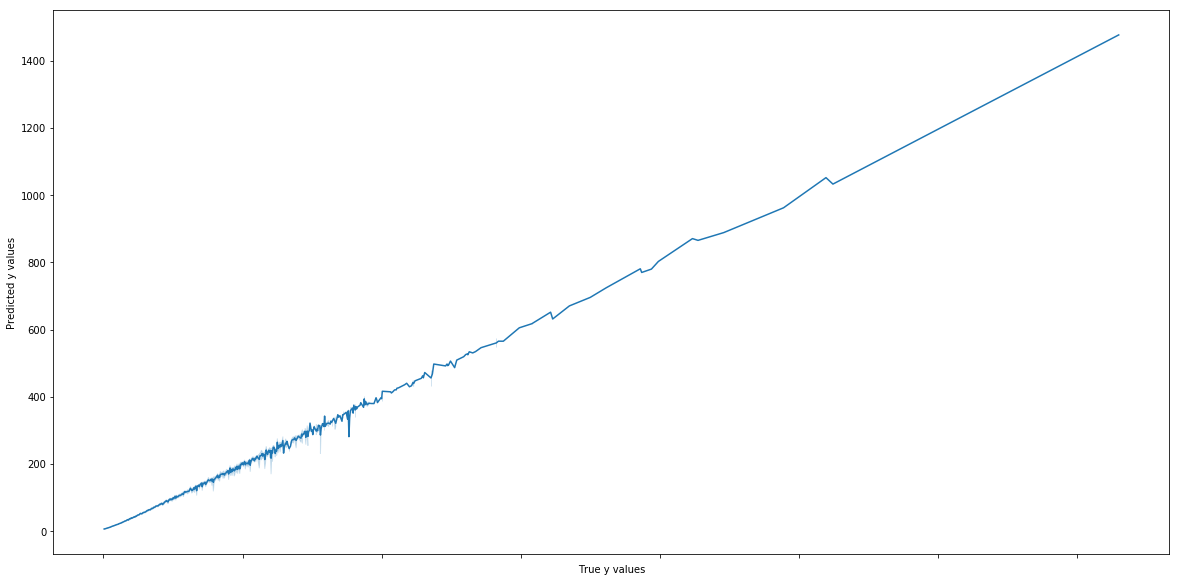

In [174]:
#A plot to visualize the true and predicted y values. As can be seen from the plot below both the values overlap each other
#with minor variations. This by no means a final model because it is possible to improve the model's performance using 
#hyper parameter tuning. Next steps therefore would include - ingest meaningful data that could boost the signals 
#features like time of travel, weekday/holiday, clustering airports that are closer based on latitude and longitude values
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=y_test, y=y_predict)
ax.set(xlabel='True y values', ylabel='Predicted y values')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-85);